## Example of comparing maf run results ##

This notebook provides a demonstration of using MAF to compare the summary statistics coming from multiple runs. These summary statistics are visible using 'showMaf' for a single run (for example, see the results from [enigma_1189](http://tusken.astro.washington.edu:8080/summaryStats?runId=2)), but we are starting to develop tools to compare these summary statistics from multiple runs. 

Requirements:
To run this notebook, you need sims_maf version >= 1.3. 
You will also need some resultsDB_sqlite.db (maf results sqlite databases) files to query. An example set (as expected in this notebook) is available for [download](http://www.astro.washington.edu/users/lynnej/opsim/results_example.tar.gz). 

In [16]:
# import the modules needed.
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from lsst.sims.maf.db import ResultsDb

Modify the next cell as needed to specify the location of your results database files. If you downloaded the [example set](http://www.astro.washington.edu/users/lynnej/opsim/results_example.tar.gz), set 'rootDir' below to the directory you wish to work with, and untar the 'results_example.tar.gz' file into that directory. 

Note that the connection to ResultsDB assumes the standard name for the resultsDB file (e.g. "resultsDb_sqlite.db"). If you modify these filenames, you should also modify the database name below. An example is given in the last line.

In [3]:
rootDir = '.'
rundb = {}
rundb['enigma_1189'] = ResultsDb(database=os.path.join(rootDir, 'enigma_1189_results.db'))
rundb['ewok_1004'] = ResultsDb(database=os.path.join(rootDir, 'ewok_1004_results.db'))

There are various methods on the resultsDb to help you gather information that was recorded in the sqlite file. 
The most relevant methods, in order to compare metrics between runs, are the **getMetricId**, **getMetricDisplayInfo**, **getSummaryStats**, and **getPlotFiles** methods. These return numpy arrays with the relevant information. Generally, the first thing you'd want to do is identify the 'metricID' for a particular metric. You may know the metric name, the slicer name, and/or the metadata associated with the metric you want.  

In [4]:
help(rundb['enigma_1189'].getMetricId)
help(rundb['enigma_1189'].getMetricDisplayInfo)
help(rundb['enigma_1189'].getSummaryStats)
help(rundb['enigma_1189'].getPlotFiles)

Help on method getMetricId in module lsst.sims.maf.db.resultsDb:

getMetricId(self, metricName, slicerName=None, metricMetadata=None, simDataName=None) method of lsst.sims.maf.db.resultsDb.ResultsDb instance
    Given a metric name and optional slicerName/metricMetadata/simData information,
    Return a list of the matching metricIds.

Help on method getMetricDisplayInfo in module lsst.sims.maf.db.resultsDb:

getMetricDisplayInfo(self, metricId=None) method of lsst.sims.maf.db.resultsDb.ResultsDb instance
    Get the contents of the metrics and displays table, together with the 'basemetricname' (optionally, for metricId list).
    Returns a numpy array of the metric information + display information.

Help on method getSummaryStats in module lsst.sims.maf.db.resultsDb:

getSummaryStats(self, metricId=None, summaryName=None) method of lsst.sims.maf.db.resultsDb.ResultsDb instance
    Get the summary stats (optionally for metricId list).
    Optionally, also specify the summary metric na

For example: you might want to look at the "Nvisits" metric results. In our scheduler validation metric runs, the "Nvisits" metric counts how many visits a field receives; without any further clarification, getMetricId will return the metric IDs associated with all metrics named Nvisits.  (There are actually one of these for each filter for each of 'All props', 'DD' and 'WFD' -- the information on the metrics available can be derived from the showMaf visualization of the MAF run results). 

In [5]:
metricName = 'Nvisits'
mIds = {}
for r in rundb:
    mIds[r] = rundb[r].getMetricId(metricName=metricName)
    print r, mIds[r]
    print ''

enigma_1189 [2280, 902, 2283, 817, 740, 1770, 2603, 1845, 824, 1276, 424, 348, 429, 2621, 1057, 981, 1695, 2357, 2361, 1350, 2628]

ewok_1004 [2231, 1116, 1766, 636, 1397, 700, 1587, 487, 1194, 2418, 1328, 2485, 2605, 2622, 2606, 1585, 563, 2290, 2228, 300, 835]



We can also specify a particular metadata value -- so let's look for Nvisits metric results for the r band, WFD only.

In [6]:
# Retrieve all summary statistics for a metric + set of metric metadata + for a particular slicer.
metricName = 'Nvisits'
metricMetadata = 'i band, WFD'
mIds = {}
for r in rundb:
    mIds[r] = rundb[r].getMetricId(metricName=metricName, metricMetadata=metricMetadata)
    print r, mIds[r]

enigma_1189 [740]
ewok_1004 [1397]


With this very specific information and the metricIds associated with this specific metric, we can then get the plots associated with this metric and the summary statistics.

In [7]:
for r in rundb:
    plotFiles = rundb[r].getPlotFiles(mIds[r])
    summaryStats = rundb[r].getSummaryStats(mIds[r])
    print "Run %s" %r
    print plotFiles['plotFile']  # this is a numpy array with the metric information + plot file name
    print summaryStats
    print ''

Run enigma_1189
['enigma_1189_Nvisits_i_band_WFD_OPSI_Histogram.pdf'
 'enigma_1189_Nvisits_i_band_WFD_OPSI_SkyMap.pdf']
[(740, 'Nvisits', 'OpsimFieldSlicer', 'i band, WFD', '75th%ile', 205.0)
 (740, 'Nvisits', 'OpsimFieldSlicer', 'i band, WFD', '25th%ile', 199.0)
 (740, 'Nvisits', 'OpsimFieldSlicer', 'i band, WFD', 'N(+3Sigma)', 3.0)
 (740, 'Nvisits', 'OpsimFieldSlicer', 'i band, WFD', 'Min', 194.0)
 (740, 'Nvisits', 'OpsimFieldSlicer', 'i band, WFD', 'Median', 202.0)
 (740, 'Nvisits', 'OpsimFieldSlicer', 'i band, WFD', 'N(-3Sigma)', 0.0)
 (740, 'Nvisits', 'OpsimFieldSlicer', 'i band, WFD', 'Max', 602.0)
 (740, 'Nvisits', 'OpsimFieldSlicer', 'i band, WFD', 'Count', 2293.0)
 (740, 'Nvisits', 'OpsimFieldSlicer', 'i band, WFD', 'Mean', 202.62363715656346)
 (740, 'Nvisits', 'OpsimFieldSlicer', 'i band, WFD', 'Rms', 11.914585513449934)]

Run ewok_1004
['ewok_1004_Nvisits_i_band_WFD_OPSI_SkyMap.pdf'
 'ewok_1004_Nvisits_i_band_WFD_OPSI_Histogram.pdf']
[ (1397, 'Nvisits', 'OpsimFieldSlicer', '

And if we had a very specific summary statistic we wanted to get, for a very specific metric, slicer and metric metadata combination: 

In [8]:
metricName = 'NVisits'
slicerName = 'OneDSlicer'
metricMetadata  = 'Per night'  # capitalization matters!
summaryStatName = 'Median'

stats = {}
for r in rundb:
    mIds = rundb[r].getMetricId(metricName=metricName, metricMetadata=metricMetadata, slicerName=slicerName)
    stats[r] = rundb[r].getSummaryStats(mIds, summaryName=summaryStatName)   

At this point, 'stats' is a dictionary containing a numpy array with fields "metricId", "metricMetadata, "slicerName",  "summaryName" and "summaryValue" for each statistic that matches the metricIds: (i.e. all the metric info and the summary statistic info). 

In [9]:
# All of the values in stats
print stats['enigma_1189']
# And the relevant 'summaryValue' -- of which there is only one, because we used one metricID and one summaryStatName.
print stats['enigma_1189']['summaryValue']

[(106, 'NVisits', 'OneDSlicer', 'Per night', 'Median', 815.0)]
[ 815.]


In [10]:
# So you can easily create bigger tables or ratios:
baseline = stats['enigma_1189']['summaryValue'][0]
for r in rundb:
    print r, stats[r]['summaryValue'][0], stats[r]['summaryValue'][0]/baseline

enigma_1189 815.0 1.0
ewok_1004 817.0 1.00245398773


In [75]:
# Or you could pull out several summary statistics, to plot together.

# Nice names for the comparisons we'll do (nice names for a plot)
metricComparisons = ['NVisits Per night', 'Mean slew time', 'Mean Nfilter changes', 
                     'Median Nvisits WFD', 'Median Nvisits r All']
# But we need to know how to pull this info out of the resultsDB, so get the actual metric names, metadata, summaryName.
metricInfo = [{'metricName':'NVisits', 'metadata':'Per night', 'summary':'Median'},
              {'metricName':'Mean slewTime', 'metadata':None, 'summary':None},
              {'metricName':'Filter Changes', 'metadata':'Per night', 'summary':'Mean'}, 
              {'metricName':'Nvisits, all filters', 'metadata':'All filters WFD: histogram only', 'summary':'Median'},
              {'metricName':'Nvisits', 'metadata':'r band, all props', 'summary':'Median'}]

stats = {}
for r in rundb:
    stats[r] = np.zeros(len(metricComparisons), float)
    for i, (mComparison, mInfo) in enumerate(zip(metricComparisons, metricInfo)):
        mIds = rundb[r].getMetricId(metricName=mInfo['metricName'], metricMetadata=mInfo['metadata'])
        s = rundb[r].getSummaryStats(mIds, summaryName=mInfo['summary'])
        stats[r][i] = s['summaryValue'][0]        
    print r, stats[r]

enigma_1189 [ 815.            6.94987078    4.59242325  919.          199.        ]
ewok_1004 [ 817.            6.82632627    4.26602776  911.          196.        ]


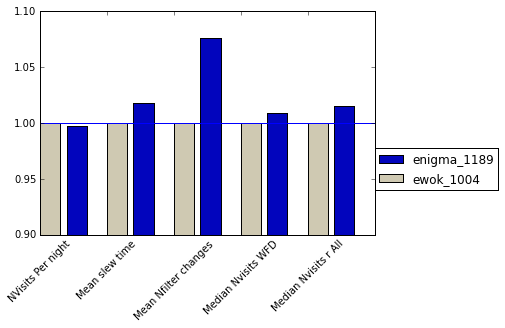

In [76]:
# Because the scales will be quite different (# of visits vs. # of filter changes, for example), normalize
#   both by dividing by the first set of values (or pick another baseline).

baseline = stats['ewok_1004']
xoffset = -0.4
x = np.arange(len(baseline))
colors = np.random.random_sample((len(baseline), 3))
for i, r in enumerate(rundb):
    plt.bar(x-xoffset, stats[r]/baseline, width=0.3, color=colors[i], label=r)
    xoffset += 0.4
plt.xticks(x, metricComparisons, rotation=45)
plt.axhline(1.0)
plt.ylim(0.9, 1.1)
plt.legend(loc=(1.0, 0.2))
    